In [18]:
using PyPlot

# 空間構造のある階層ベイズモデル

・場所差の空間相関も考慮する統計モデリング。

## 11.1　例題:一次元空間上の個体数分布
・対象生物の数をカウントするために調査区画を50個設定し、それが一本の直線上に等間隔に配置されていたとする。  
・調査区画jで観察された個体数$y_i$を下図に示している。  
・この架空データ$\{y_i\}$は場所jごとに平均の異なるポアソン乱数として発生させたものである。その平均が下図の破線の曲線。  
・これを局所密度という。  
・今回は図示するだけであるが、空間相関を調べるには他にも方法がある。

In [13]:
data1 = [0,3,2,5,6,16,8,14,11,10,17,19,14,19,19,18,15,13,13,9,11,15,18,12,11,17,14,16,15,9,6,15,10,11,14,7,14,14,13,17,8,7,10,4,5,5,7,4,3,1]

50-element Array{Int64,1}:
  0
  3
  2
  5
  6
 16
  8
 14
 11
 10
 17
 19
 14
  ⋮
 13
 17
  8
  7
 10
  4
  5
  5
  7
  4
  3
  1

In [25]:
data2 = [2.15498, 3.254165, 4.628666, 6.234124, 7.99073, 9.794474, 11.53337, 13.10425, 14.4263, 15.44878, 16.15265, 16.54711, 16.66296, 16.54479, 16.24353, 15.81052, 15.29319, 14.73267, 14.16266, 13.60948, 13.09271, 12.62614, 12.21888, 11.87634, 11.60111, 11.39361, 11.25259, 11.17534, 11.1578, 11.19447, 11.27811, 11.39943, 11.54659, 11.70476, 11.85573, 11.97773, 12.04559, 12.03155, 11.90668, 11.6433, 11.21819, 10.61646, 9.835614, 8.888846, 7.806816, 6.636728, 5.438219, 4.276194, 3.211708, 2.292856]

50-element Array{Float64,1}:
  2.15498
  3.25416
  4.62867
  6.23412
  7.99073
  9.79447
 11.5334 
 13.1043 
 14.4263 
 15.4488 
 16.1527 
 16.5471 
 16.663  
  ⋮      
 11.9067 
 11.6433 
 11.2182 
 10.6165 
  9.83561
  8.88885
  7.80682
  6.63673
  5.43822
  4.27619
  3.21171
  2.29286

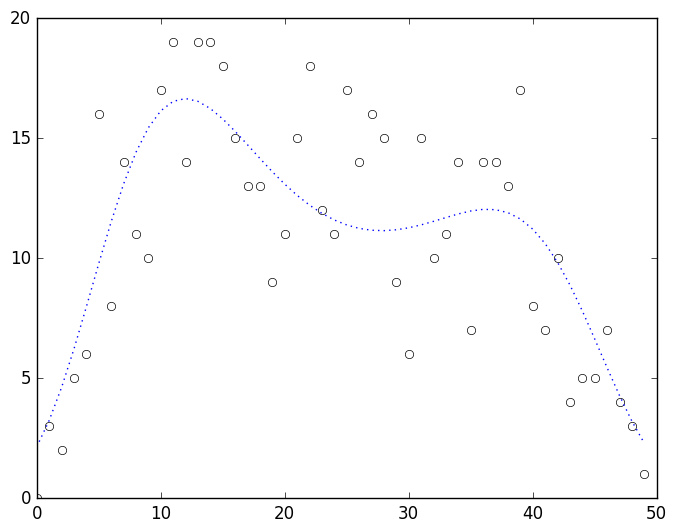

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c290550>

In [28]:
plot(data1, "wo")
plot(data2, "b:")

## 11.2 階層ベイズモデルに空間構造をくみこむ
・とりかかりとして上図の個体数$y_i$が、すべての区画で共通する平均値λのポアソン分布にしたがうとする。  
$$p(y_i|\lambda)=\frac{\lambda^{y_i}exp(-\lambda)}{y_j!}$$  
・この仮定のもとでは標本平均は10.9ぐらいになり、分散も10.9ぐらいになると予測される。

In [29]:
var(data1)

27.373061224489792

・しかし、実際には標本分散は27.4もある。  
・このデータは過分散・・・単純なポアソン分布では統計モデル化できない。  

平均値はλであると仮定するのではなく、区画jごとに平均$\lambda_j$が異なるとする。  
⇆全体に共通する大域的な密度と局所的な差異を同時に組み込む。  
平均個体数$\lambda_j$を線形予測子と対数リンク関数を使って、以下のように表す。　　
$$log\lambda_j = \beta + r_j $$

※βのような大域的なパラメーターの事前分布には無情報事前分布を指定する。  
※$\{r_j\}$の事前分布として階層事前分布を指定する。

### 11.2.1 空間構造のない階層事前分布  
階層差$r_j$の事前分布は具体的にはどのように設定すればいいのか。
例えば、  
$$ p(r_j|s) = \frac{1}{\sqrt{2\pi s^2}}exp(-\frac{r_j^2}{2s^2})$$  
を指定したとすると、場所差$r_j$はどれも独立に同じ事前分布と仮定していることになる。

### 11.2.2 空間構造のある階層事前分布  
場所差$r_j$が位置によって少しずつ変化する様子をうまく表現するためには、事前分布にもう少し工夫が必要。  
・区画の場所差は「近傍」区画の場所差にしか影響されない。  
・区画jの近傍の個数$n_j$は有限個であり、どの区画の近傍であるかはモデル設計者が指定する。
・近傍の直接の影響はどれも等しく$\frac{1}{n_j}$。  
ここでは直線上に観測地が配置されているので近傍数$n_j$は2。  
ただし、左右の両端$j\in\{1, 50\}$では近傍区画はひとつなので、$n_1$と$n_50$は１。  
$r_j$の近傍である$r_{j-1}$と$r_{j+1}$の値を固定。  
$$p(r_j|\mu_j, s) = \sqrt{n_j}{2\pi s^2}exp\{-\frac{(r_j - \mu_j)^2}{2s^2/n_j}\}$$  
この正規分布の平均$\mu_j$は近傍の平均値に等しいとする。　　
・確率分布のばらつきのパラメーターsはどの場所でも同じと仮定する。